In this tutorial, we are processing the original image (RGB, unsigned 8 bits per channel) in the following steps:
<ul>
<li><a href="http://en.wikipedia.org/wiki/Cropping_(image)">Crop the image</a>, i.e. select only the part of the image inside a predefined ROI
<li><a href="http://en.wikipedia.org/wiki/Image_scaling">Scale the image</a> to a fixed, small resultion
<li>Select the <a href="http://en.wikipedia.org/wiki/Channel_(digital_image)">red channel</a>
<li>Adjust the contrast with <a href="http://en.wikipedia.org/wiki/Histogram_equalization">histogram equalization</a>
<li>Finally, <a href="http://en.wikipedia.org/wiki/Normalization_(image_processing)">normalize</a> the pixel values to the interval [-1,+1]
</ul>
<p>First, let's read <a href="https://raw.githubusercontent.com/ecervera/notebooks/master/img/tomatos.jpg">a sample image</a> and display it in a figure.
<p><small>(Warning: if this notebook is run locally, you need to download and save the file image in your computer).</small>

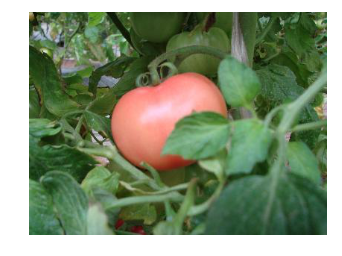

In [1]:
%matplotlib inline
from pylab import imread, imshow, axis
img = imread('img/tomatos.jpg')
imshow(img)
a = axis('off')

## Crop the image

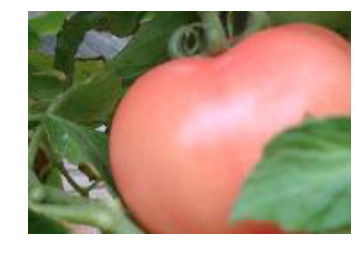

In [2]:
x1, y1 = 75, 65
x2, y2 = 200, 245
crop_img = img[x1:x2,y1:y2,:]
imshow(crop_img)
a = axis('off')

## Scale the image

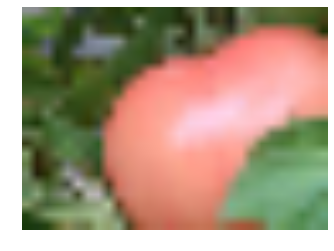

In [3]:
from scipy.misc import imresize
dx, dy = 22,30
sc_img = imresize(crop_img, (dx,dy,3))
imshow(sc_img)
a = axis('off')

## Select the red channel

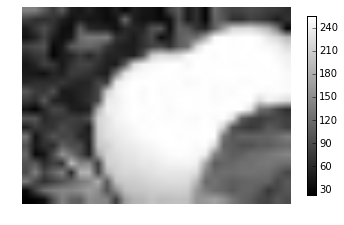

In [4]:
from pylab import gray, colorbar
R_img = sc_img[:,:,0]
imshow(R_img)
gray()
colorbar(shrink=0.8)
a = axis('off')

## Histogram equalization
See <a href="http://www.janeriksolem.net/2009/06/histogram-equalization-with-python-and.html">this blog</a> for details.

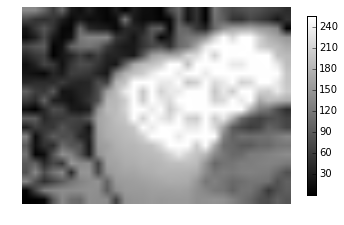

In [5]:
from numpy import histogram, interp
def histeq(im,nbr_bins=256):
   imhist,bins = histogram(im.flatten(),nbr_bins,normed=True)
   cdf = imhist.cumsum()
   cdf = 255 * cdf / cdf[-1]
   im2 = interp(im.flatten(),bins[:-1],cdf)
   return im2.reshape(im.shape), cdf

eq_img, cdf = histeq(R_img)
imshow(eq_img)
colorbar(shrink=0.8)
a = axis('off')

## Normalization

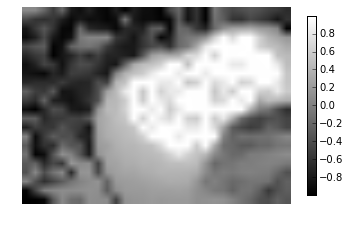

In [6]:
norm_img = 2*(eq_img - 128) / 256
imshow(norm_img)
colorbar(shrink=0.8)
a = axis('off')